# Facility location problems examples #

In the following, a couple of examples discusses in the course will be presented.
The basic instructions to use the optimization software are provided.

**The software is meant for didactic purposes only.**

*v1.4 - Last update: 2024-04-26*


Import the data of the scenario 1 and the optimization function (netopt)
Press shift + enter in each cell to run the commands, or click on Run in the command bar

In [22]:
from netopt import netopt, print_solution, plot_map, print_dict
from data.projectwork23_24_data import warehouses, customers
from data_structures import show_data, show_geo_map, calculate_dm, set_demand, set_capacity, set_all_capacities

Compute the linear distances using the geographical coordinates (longitude and latitude) of the locations

In [23]:
distance = calculate_dm(warehouses, customers, use_haversine=True)

**Plot the data**

You can control the colors and shapes in the plot using the following parameters (also in the netopt function):
- warehouse_marker=shape of the warehouse icons. Allowed values are s=square, o=circle, *=star, ^=triangle, v=inverted triangle. Default is s 
- warehouse_markercolor=color of the warehouse icons. Allowed values are red, green, blue, black, yellow. Default is red
- warehouse_markersize=size of the warehouse icons. Default is 4
- warehouse_active_markersize=size of the warehouse icons representing active (open) warehouses. Default is 5
- customer_marker=shape of the customer icons. Default is o
- customer_markercolor=color of the customer icons. Default is blue
- customer_markersize=size of the customer icons. Default is 4

If you don't specify the above parameters about the figures, the default values will be assumed

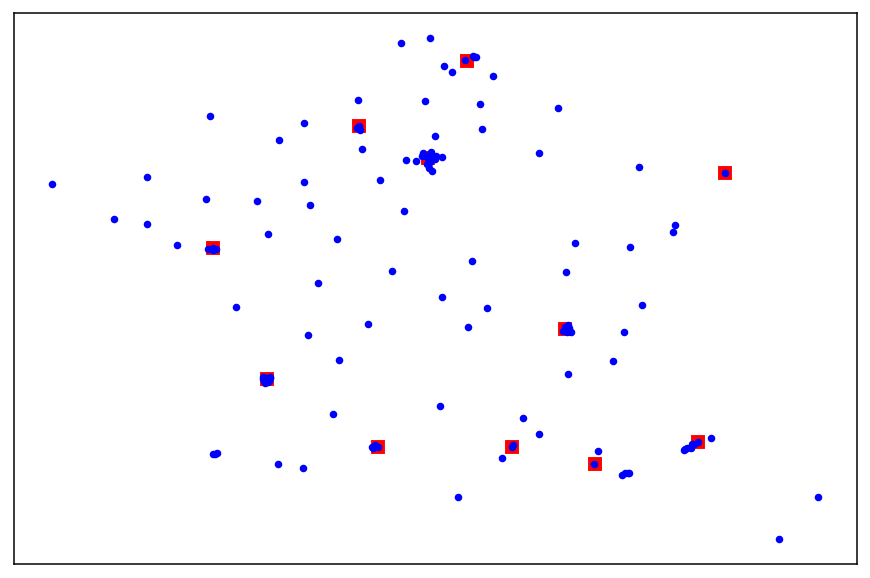

In [24]:
plot_map(customers=customers,
         warehouses=warehouses,
         warehouse_marker='s',
         warehouse_markercolor='red',
         warehouse_markersize=6,
         customer_marker='o',
         customer_markercolor='blue',
         customer_markersize=3)

A better map can be shown using the following command. However, this map allows only for the
visualization of location. To show the connections in the final solution you should use the plot_map command

In [25]:
show_geo_map(customers=customers, warehouses=warehouses, zoom=4)

**Get the optmimal location of num_warehouses warehouses**

You can change the value of parameter num_warehouses to test different scenario.
The parameter warehouses, customers, and distance are loaded in the previous cell.
You must define the objective: the objective mindistance minimizes the average weighted distance.
By setting the parameter plot to True, the function returns a simplyfied picture of the solution along with a summary of the performance. 
If you don't want the picture, set plot to False.

If you set hide_inactive to True the plot would not show inactive warehouses.
Outflow in the results represents the quantity exiting from each warehouse.


In [26]:
results = netopt(num_warehouses=3,  # this is the p parameter in the p-median problem
                 objective='mindistance',
                 warehouses=warehouses,
                 customers=customers,
                 distance=distance,
                 plot=True,
                 hide_inactive=True,
                 warehouse_marker='s',
                 warehouse_markercolor='red',
                 warehouse_markersize=6,
                 warehouse_active_markersize=12,
                 customer_marker='o',
                 customer_markercolor='blue',
                 customer_markersize=1)

CHECK INPUTS...OK
BUILD MODEL...OK
SOLVING (time limit = 120 seconds)...OK
Optimization Status:  Not Solved
********* ERROR: Model not solved, time limit probably exceeded (the model is likely too large), don't use the results.


**Service levels**

By adding the parameter distance_ranges the functions returns the % of the demand within the passed distance ranges. 
For example, if distance_ranges = [0, 100, 200] the functions return the percentage of demand in the ranges [0, 100], (100, 200], (200, 99999]
where 99999 is used to represent a very long distance (i.e. infinite distance).

By changing the parameter num_warehouses and distance_ranges you can test different scenarios.
The parameter distance_ranges must be a list of increasing numbers. If you do not pass 0 as the first value
it will be automatically added


In [27]:
results = netopt(num_warehouses=20,
                 objective='mindistance',
                 warehouses=warehouses,
                 customers=customers,
                 distance=distance,
                 distance_ranges=[0, 100, 400, 800, 3200],
                 plot=True,
                 hide_inactive=True,
                 warehouse_marker='s',
                 warehouse_markercolor='red',
                 warehouse_markersize=6,
                 warehouse_active_markersize=12,
                 customer_marker='o',
                 customer_markercolor='blue',
                 customer_markersize=1)

CHECK INPUTS...OK
BUILD MODEL...OK
SOLVING (time limit = 120 seconds)...OK
Optimization Status:  Infeasible
********* ERROR: Model not feasible, don't use the results.


The results variable contains a summary of the optimization report

In [28]:
print(results)

None


For a slightly better visualization of the results use print_solution as follows

In [29]:
print_solution(results)

None


**Force warehouses open or close**

It is also possible to force warehouses to be open (for example, to force using the current warehouse)
or closed (to avoid the selection of some candidates).

The warehouses are references through their id, and must be passed as list [] (even for a single value, that is
to force closed the warehouse with id 1 you should pass force_closed=[1])

The id of the warehouses can be found in the 'warehouses' variable using the *show_data()* method.


In [30]:
show_data(warehouses)

|    |   Id | Identifier   | City        |   Latitude |   Longitude |   Capacity |   Yearly fixed cost |
|---:|-----:|:-------------|:------------|-----------:|------------:|-----------:|--------------------:|
|  0 |    0 | W0           | Paris       |     48.853 |       2.349 |       1100 |                   0 |
|  1 |    1 | W1           | Marseille   |     43.297 |       5.381 |        800 |                   0 |
|  2 |    2 | W2           | Lyon        |     45.748 |       4.847 |        800 |                   0 |
|  3 |    3 | W3           | Toulouse    |     43.604 |       1.444 |        900 |                   0 |
|  4 |    4 | W4           | Nice        |     43.703 |       7.266 |        800 |                   0 |
|  5 |    5 | W5           | Nantes      |     47.217 |      -1.553 |        900 |                   0 |
|  6 |    6 | W6           | Strasbourg  |     48.584 |       7.746 |        600 |                   0 |
|  7 |    7 | W7           | Bordeaux    |     44.84  |

In [31]:
results = netopt(num_warehouses=3,
                 objective='mindistance',
                 warehouses=warehouses,
                 customers=customers,
                 distance=distance,
                 force_open=[1],
                 force_closed=[8, 3],
                 distance_ranges=[0, 100, 400, 800, 3200],
                 plot=True,
                 hide_inactive=True,
                 warehouse_marker='s',
                 warehouse_markercolor='red',
                 warehouse_markersize=6,
                 warehouse_active_markersize=12,
                 customer_marker='o',
                 customer_markercolor='blue',
                 customer_markersize=1)

CHECK INPUTS...OK
BUILD MODEL...Forcing open warehouses: [1]
Forcing closed warehouses: [8, 3]
OK
SOLVING (time limit = 120 seconds)...OK
Optimization Status:  Infeasible
********* ERROR: Model not feasible, don't use the results.


**Mutually exclusive facilities**

In some cases, some facilities may be _mutually exclusive_, that is the presence of one facility excludes the activation of a subset of other facilities.

For example, let's assume that facilities 1, 14 and 15 (i.e. tha facilities in the solution of the previous cell) are mutually exclusive (either one of them or none of them can be selected). This can be formulated by passing the parameter

_mutually_exclusive = [(1, 14, 15)]_


In [32]:
results = netopt(num_warehouses=3,
                 objective='mindistance',
                 warehouses=warehouses,
                 customers=customers,
                 distance=distance,
                 force_open=[1],
                 force_closed=[8, 3],
                 distance_ranges=[0, 100, 400, 800, 3200],
                 mutually_exclusive=[(1, 14, 15)],
                 plot=True,
                 hide_inactive=True,
                 warehouse_marker='s',
                 warehouse_markercolor='red',
                 warehouse_markersize=6,
                 warehouse_active_markersize=12,
                 customer_marker='o',
                 customer_markercolor='blue',
                 customer_markersize=1)

CHECK INPUTS...OK
BUILD MODEL...

KeyError: 14

It is possible to set any number of mutually exclusive sets (each set is a tuple in a list). For example:

_mutually_exclusive = [(1, 14, 15), (3, 4), (5, 6, 9, 11)]_

This constraint is useful when we have different alternatives (for example, different sizes) for the same facility.

**Covering problem**

The objective maxcover maximises the % of demand within a distance specified by the high_service_distance parameter. 
If you set the objective to maxcover and don't specify the high_service_distance parameter you'll get an error.

You should also set hide_flows to True to avoid the display of the allocations of customers to warehouses.

In [ ]:
results = netopt(num_warehouses=5,
                 objective='maxcover',
                 warehouses=warehouses,
                 customers=customers,
                 distance=distance,
                 high_service_distance=800,
                 avg_service_distance=5000,
                 distance_ranges=[0, 100, 400, 800, 3200],
                 force_open=[],
                 force_closed=[],
                 plot=True,
                 hide_inactive=True,
                 hide_flows=True,
                 warehouse_marker='s',
                 warehouse_markercolor='red',
                 warehouse_markersize=6,
                 warehouse_active_markersize=12,
                 customer_marker='o',
                 customer_markercolor='blue',
                 customer_markersize=1)

#print_solution(results)


If you know a little bit of python (or you are willing to learn a little bit), 
you can easily automate experiments.
For example, compute the average weighted distance for several values of *p*


In [ ]:
for p in [1, 2, 3, 4, 5]:
    results = netopt(num_warehouses=p,
                 objective='mindistance',
                 warehouses=warehouses,
                 customers=customers,
                 distance=distance,
                 force_open=[],
                 force_closed=[],
                 plot=False)
    print()
    print(f"*** AVG WEIGHTED DISTANCE FOR p={p}: {results['avg_weighted_distance']} ***")
    print()


You can collect data from different experiments and the plot it.

In [ ]:
data = {}
for p in [1, 2, 3, 4, 5]:
    results = netopt(num_warehouses=p,
                 objective='mindistance',
                 warehouses=warehouses,
                 customers=customers,
                 distance=distance,
                 force_open=[],
                 plot=False)
    data[p] = results['avg_weighted_distance']
    
# Plot the results
import matplotlib.pyplot as plt
plt.plot(data.keys(), data.values())

# Adding capacity #

Import the data for the problem with capacities

In [ ]:
from data.scenario_5 import warehouses, customers

Compute the distance matrix

In [ ]:
distance = calculate_dm(warehouses, customers, use_haversine=True)

In [ ]:
show_geo_map(customers=customers, warehouses=warehouses, zoom=4)

Solve a p-median problem excluding the capacities: since the warehouses have the *capacity* attributes set, we need to instruct the solver to skip such an attribute in solvgin the problem by settin *force_uncapacitated=True*).

In [ ]:
results = netopt(num_warehouses=5,
                 warehouses=warehouses,
                 customers=customers,
                 distance=distance,
                 objective='mindistance',
                 force_uncapacitated=True,
                 distance_ranges=[0, 800, 1200],
                 plot=True,
                 warehouse_markersize=5,
                 warehouse_active_markersize=8,
                hide_inactive=True)
print_dict(results)

We would like to spread the quantity more evenly
Let's limit the capacity of the five warehouses to 1/5 of the total demand

In [ ]:
set_all_capacities(warehouses, 20_000_000)

Solve again a mindistance problem with capacities, enforcing the single sourcing constraint. This constraint is implicit, you don't need to change anything.

In [ ]:
results = netopt(num_warehouses=5,
                 warehouses=warehouses,
                 customers=customers,
                 distance=distance,
                 objective='mindistance',
                 force_uncapacitated=False,
                 distance_ranges=[0, 800, 1200],
                 plot=True,
                 warehouse_markersize=5,
                 warehouse_active_markersize=8)
print_dict(results)

The model in **infeasible** that is there is no solution.

Let's increase the capacity of all warehouses to 30.000.000 units and solve again.

In [ ]:
set_all_capacities(warehouses, 30_000_000)

results = netopt(num_warehouses=5,
                 warehouses=warehouses,
                 customers=customers,
                 distance=distance,
                 objective='mindistance',
                 force_uncapacitated=False,
                 hide_inactive=True,
                 distance_ranges=[0, 800, 1200],
                 plot=True,
                 warehouse_markersize=5,
                 warehouse_active_markersize=8)
print_dict(results)

Now the model is feasible

**Remove the single-source constraint**

The model implicitly stipulates the single-source constraint (each customer is served by exactly one warehouse).
When dealing with capacities, it may be useful to relax this constraint to better exploit the available capacity.

To relax the single-source constraint set *force_single_sourcing=False*

We try solving again with capacity equal to 20.000.000 for all warehouses and no single-source constraint.

In [ ]:
set_all_capacities(warehouses, 20_000_000)

results = netopt(num_warehouses=5,
                 warehouses=warehouses,
                 customers=customers,
                 distance=distance,
                 objective='mindistance',
                 distance_ranges=[0, 800, 1200],
                 force_single_sourcing=False,
                 plot=True,
                 hide_inactive=True,
                 warehouse_markersize=5,
                 warehouse_active_markersize=8)
print_dict(results)

Now the model is feasible

**Feel free to play with the parameters. If you find any error, please report it to me.**